In [36]:
import numpy as np
from pandas import Series, DataFrame, date_range
from pandas.tseries.offsets import MonthEnd
import pandas as pd
import matplotlib.pyplot as plt
plt.close('all')
import seaborn as sns
import random
import math 


import datetime
plt.rc('figure', figsize=(12, 10))
from numpy.linalg import inv
from numpy import dot

In [37]:
DFOri = pd.read_excel(r'C:\Users\Madhav Gulati\OneDrive\BRD Project Area\Data\BRD Monitoring - for analysis.xls')
DFOri.iloc[814]

Date                           2018-11-22 00:00:00
Time                                      11:43:02
Latitude                                  -31.2725
Longitude                                  142.305
Data Type                                Real Data
Species                     Ctenophorus mirrityana
Sex                                           Male
Age                                          Adult
Activity                           SEARCH Transect
Data Type.1                        Transect Record
Site                                 Mutawintji NP
Transect Number                                NaN
Trans. Bearing (degrees)                       NaN
Observer - Start                               NaN
Observers                               Gerry Swan
Temperature - Start                            NaN
Wind Speed - Start                             NaN
Wind Direction                                 NaN
Humidity - Start                               NaN
Cloud Cover - Start            

In [38]:
DFOri['Date'] = pd.to_datetime(DFOri.Date.astype('str'))
DF1 = DFOri.set_index('Date')
DF1.head()

,Time,Latitude,Longitude,Data Type,Species,Sex,Age,Activity,Data Type.1,Site,...,Wind Direction,Humidity - Start,Cloud Cover - Start,GenVegConOther - Note,Other Comments,Range (meters),Bearing (degrees),Inclination (degrees),Record Type,Behaviour
Date,,,,,,,,,,,,,,,,,,,,,
2013-07-12,13:36:50,-31.316560,142.329812,Real Data,NaN,NaN,NaN,SEARCH Transect,Start Transect,Mutawintji NP,...,NaN,NaN,NaN,NaN,Old Mutawintji Gorge - Added post field survey...,NaN,NaN,NaN,Start Transect,NaN
2013-07-12,13:38:48,-31.314617,142.335820,Real Data,NaN,NaN,NaN,SEARCH Transect,End Transect,Mutawintji NP,...,NaN,NaN,NaN,NaN,Old Mutwintji Gorge - Record added later due t...,NaN,NaN,NaN,End Transect,NaN
2013-12-06,14:26:49,-31.256820,142.293442,Real Data,Ctenophorus mirrityana,Male,Adult,POP Transect,Transect Record,Mutawintji NP,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,Transect Record,Rest
2013-12-06,15:22:17,-31.289618,142.296615,Real Data,Ctenophorus mirrityana,Unknown,Juvenile,POP Transect,Transect Record,Mutawintji NP,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,Transect Record,Rest
2013-12-06,15:47:48,-31.292693,142.298810,Real Data,Ctenophorus mirrityana,Unknown,Juvenile,POP Transect,Transect Record,Mutawintji NP,...,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,Transect Record,Rest


In [39]:
DF1 = DF1.drop(['Data Type', 'Wind Direction', 'GenVegConOther - Note', 'Cloud Cover - Start', 'Observer - Start', 
               'Observers', 'Wind Speed - Start', 'Other Comments', 'Record Type'], axis = 1)

In [40]:
DF1 = DF1.rename(columns={'Data Type.1':'Type'})
DF1.head()

,Time,Latitude,Longitude,Species,Sex,Age,Activity,Type,Site,Transect Number,Trans. Bearing (degrees),Temperature - Start,Humidity - Start,Range (meters),Bearing (degrees),Inclination (degrees),Behaviour
Date,,,,,,,,,,,,,,,,,
2013-07-12,13:36:50,-31.316560,142.329812,NaN,NaN,NaN,SEARCH Transect,Start Transect,Mutawintji NP,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-12,13:38:48,-31.314617,142.335820,NaN,NaN,NaN,SEARCH Transect,End Transect,Mutawintji NP,12.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-12-06,14:26:49,-31.256820,142.293442,Ctenophorus mirrityana,Male,Adult,POP Transect,Transect Record,Mutawintji NP,9.0,NaN,NaN,NaN,NaN,NaN,NaN,Rest
2013-12-06,15:22:17,-31.289618,142.296615,Ctenophorus mirrityana,Unknown,Juvenile,POP Transect,Transect Record,Mutawintji NP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Rest
2013-12-06,15:47:48,-31.292693,142.298810,Ctenophorus mirrityana,Unknown,Juvenile,POP Transect,Transect Record,Mutawintji NP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Rest


In [41]:
DF2 = DF1[(DF1.Type != "Start Transect")]

In [42]:
DF2 = DF2[(DF2.Type != "End Transect")]

In [43]:
DF2 = DF2[(DF2.Species == "Ctenophorus mirrityana")]

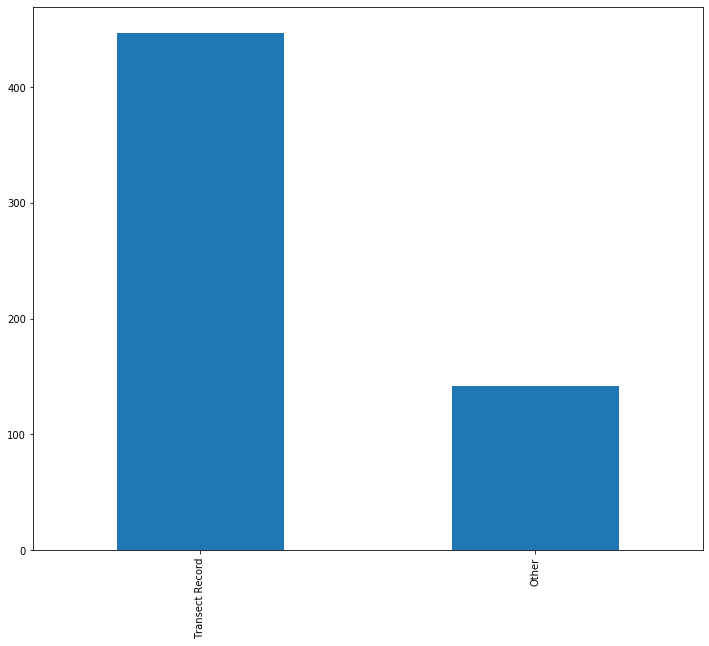

In [44]:
DF1['Type'].value_counts().plot(kind='bar')
DF2['Type'].value_counts().plot(kind='bar')

C:\Users\Madhav Gulati\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


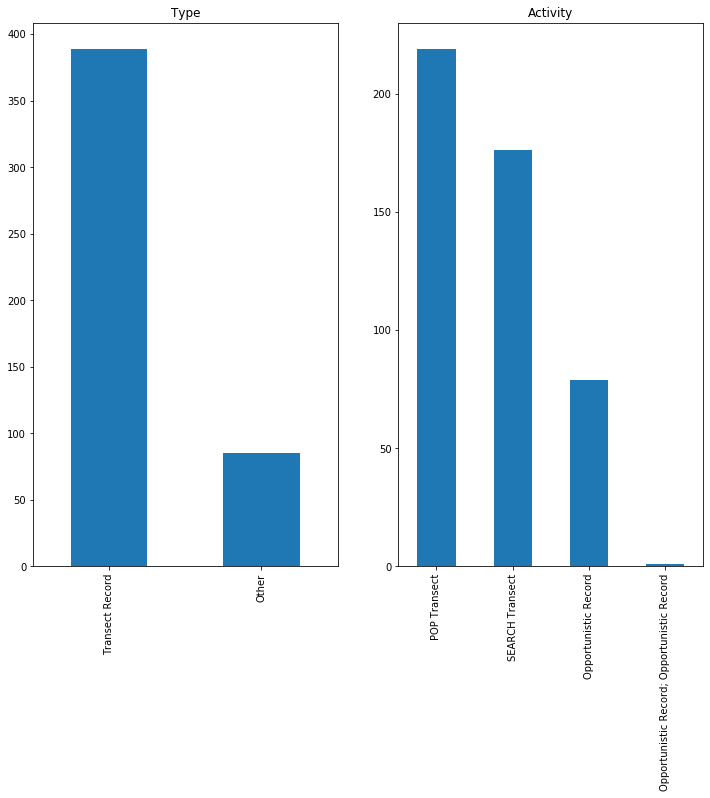

In [45]:
categorical_features = ["Type", "Activity"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(DF2[categorical_features]):
    DF2[categorical_feature].value_counts().plot(kind = "bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

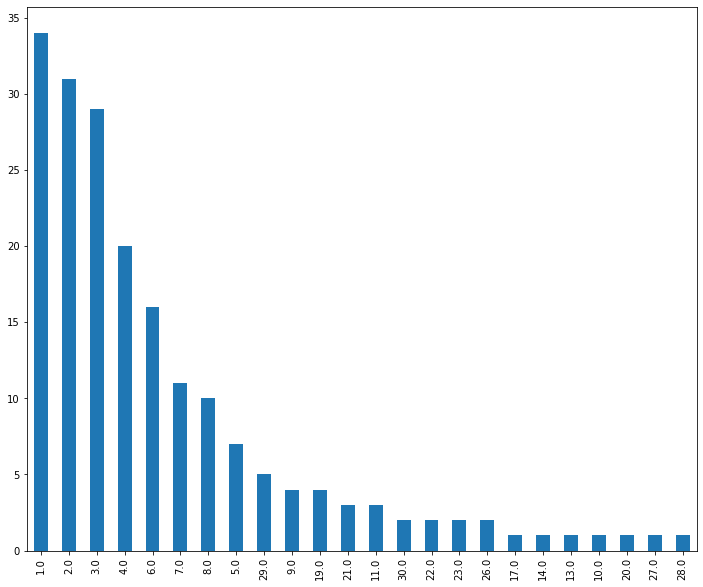

In [46]:
DF2['Transect Number'].value_counts().plot(kind='bar')

In [47]:
DF2= DF2.rename(columns = {'Bearing (degrees)': 'Bearing', 'Range (meters)': 'Range'})
DF2.replace('', np.nan, inplace=True)
DF2.describe()

,Latitude,Longitude,Transect Number,Trans. Bearing (degrees),Temperature - Start,Humidity - Start,Range,Bearing,Inclination (degrees)
count,473.000000,473.000000,192.000000,0.0,83.000000,83.000000,218.000000,197.000000,10.000000
mean,-31.531496,141.639380,6.432292,NaN,29.790361,31.302410,10.128899,170.878173,19.025000
std,0.185571,0.448595,7.318169,NaN,3.020201,11.702991,9.692728,120.801893,21.935654
min,-31.728939,141.235714,1.000000,NaN,21.600000,0.000000,0.000000,0.000000,0.000000
25%,-31.660650,141.333457,2.000000,NaN,28.700000,21.100000,4.200000,45.000000,0.062500
50%,-31.655723,141.336442,4.000000,NaN,30.700000,32.800000,7.950000,190.000000,10.000000
75%,-31.291138,142.275873,7.000000,NaN,31.700000,38.900000,12.000000,283.000000,33.750000
max,-31.194852,142.342077,30.000000,NaN,34.800000,75.300000,63.000000,355.000000,60.000000


In [48]:
DFori = DF2

In [49]:
DFori.to_excel(r'C:\Users\Madhav Gulati\OneDrive\BRD Analysis.xlsx', sheet_name='BRD', index = True)

In [50]:
#def cleaning(dataframe, col = DF2['Angle'], val = DF2['Angle'].values):
    #dataframe = pd.DataFrame(dataframe)
    
    #if np.any(val == 0) :
        
        #return col.apply(lambda x: np.random.randint(15, 360))
                       
    #else:
        #return val
    
    #return dataframe

In [51]:
def cleaning(dataframe, x, y, col):
    
    for val in dataframe :
        
        dataframe = pd.DataFrame(dataframe)
        val = pd.DataFrame(np.array([col])).values
        
        if np.any(val == 0) :
            return col.apply(lambda val: np.random.randint(x, y))
                       
        else:
            return val
        
        return dataframe

In [52]:
anglerandom = cleaning(DF2, 15, 360, DF2['Bearing']) 
DF2['Bearing'].iloc[450]

190.0

In [53]:
DF2['Bearing'] = DF2['Bearing'].fillna(value = anglerandom)
DF2['Bearing']
DF2['Bearing'].iloc[450]

190.0

In [54]:
DF2.describe()

,Latitude,Longitude,Transect Number,Trans. Bearing (degrees),Temperature - Start,Humidity - Start,Range,Bearing,Inclination (degrees)
count,473.000000,473.000000,192.000000,0.0,83.000000,83.000000,218.000000,475.000000,10.000000
mean,-31.531496,141.639380,6.432292,NaN,29.790361,31.302410,10.128899,180.393684,19.025000
std,0.185571,0.448595,7.318169,NaN,3.020201,11.702991,9.692728,108.821122,21.935654
min,-31.728939,141.235714,1.000000,NaN,21.600000,0.000000,0.000000,0.000000,0.000000
25%,-31.660650,141.333457,2.000000,NaN,28.700000,21.100000,4.200000,77.000000,0.062500
50%,-31.655723,141.336442,4.000000,NaN,30.700000,32.800000,7.950000,190.000000,10.000000
75%,-31.291138,142.275873,7.000000,NaN,31.700000,38.900000,12.000000,273.000000,33.750000
max,-31.194852,142.342077,30.000000,NaN,34.800000,75.300000,63.000000,359.000000,60.000000


In [55]:
Range = cleaning(DF2, 0, 63, DF2['Range'])
DF2['Range'] = DF2['Range'].fillna(value = Range)
DF2['Range'].head()

Date
2013-12-06     9.0
2013-12-06    42.0
2013-12-06     5.0
2013-12-06     8.0
2013-12-06    28.0
Name: Range, dtype: float64

In [56]:
DF2.to_excel(r'C:\Users\Madhav Gulati\OneDrive\BRD AnalysisR.xlsx', sheet_name='BRD', index = True)

In [57]:
DFN = pd.DataFrame(DF2[(DF2.Bearing <= 90)])
DFE = pd.DataFrame(DF2[(DF2.Bearing > 90) & (DF2.Bearing <= 180)])
DFS = pd.DataFrame(DF2[(DF2.Bearing > 180) & (DF2.Bearing <= 270)])
DFW = pd.DataFrame(DF2[(DF2.Bearing >= 270 )])
#DFN

def thetat(DF, col):

#x = input("Enter x: ")
#y = input("Enter y: ")
#z = input("Enter z: ")


x = 90
y = 180
z = 270

#df1 = pd.DataFrame(DF.col <= z)
#df2 = DF[(DF.col > x) & (DF.col <= y)]
#df3 = DF[(DF.col > y) & (DF.col  <= z)]
#df4 = DF[(DF.col >= z )]

#def col2(df):
    #df = pd.DataFrame(df)

for val in DF:
    DF = pd.DataFrame(DF)
    col = val

    while npval >= z:
        return  360 - val
    while  val > y:
        return z - val
    while  val > x:
        return y - val
    else:
        return val
    #return col2
#df1 = col2(df1)
#df2 = col2(df2)
#df3 = col2(df3)
#df4 = col2(df4)

#df5 = [df1, df2, df3, df4]
#df5 = pd.concat[df5]

#DF['Angle'] = df5

#return DF
thetat(DF2, DF2['Bearing'].values)

def theta(col):

for val in col:
    col = pd.DataFrame(col)
    val = pd.DataFrame(col.values)

    if np.all(val >= 270):
        return  pd.DataFrame(360 - val)
    if  np.all(val > 180):
        return pd.DataFrame(270 - val)
    if np.all( val > 90):
        return pd.DataFrame(180 - val)
    else:
        return val
    return pd.DataFrame(col)
DFW = (theta( DFW['Bearing'])) DFN = (theta( DFN['Bearing'])) DFS = (theta( DFS['Bearing'])) DFE = (theta( DFE['Bearing']))

DF3 = pd.concat([DFW, DFS, DFW, DFN]) DF3

Angle2.reset_index(drop = False) Angle3.reset_index(drop = False) Angle4.reset_index(drop = False) Angle1.reset_index(drop = False) Angle1

In [58]:
DF3 = pd.read_excel(r'C:\Users\Madhav Gulati\OneDrive\BRD Project Area\Data\BRD Analysis Random.xlsx')

In [59]:
def sintheta(col):
    
    for val in col :
        
        dataframe = pd.DataFrame(col)
        val = pd.DataFrame(np.array([col])).values
        return col.apply(lambda val: math.sin(val))
    return(col)

In [60]:
DF3['Sin'] = sintheta(DF3['Angle'])
#DF3['Sin']
#DF3['Angle']

In [61]:
DF3['Avg Distance'] = abs(DF3['Sin']*DF3['Range'])
DF3['Avg Distance'].head()

0    13.639461
1    10.658704
2     6.706018
3    29.680747
4     6.705469
Name: Avg Distance, dtype: float64

In [62]:
DFori = pd.read_excel(r'C:\Users\Madhav Gulati\OneDrive\BRD Project Area\Data\BRD Analysis.xlsx')
DFori['Sin'] = sintheta(DFori['Angle'])

C:\Users\Madhav Gulati\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


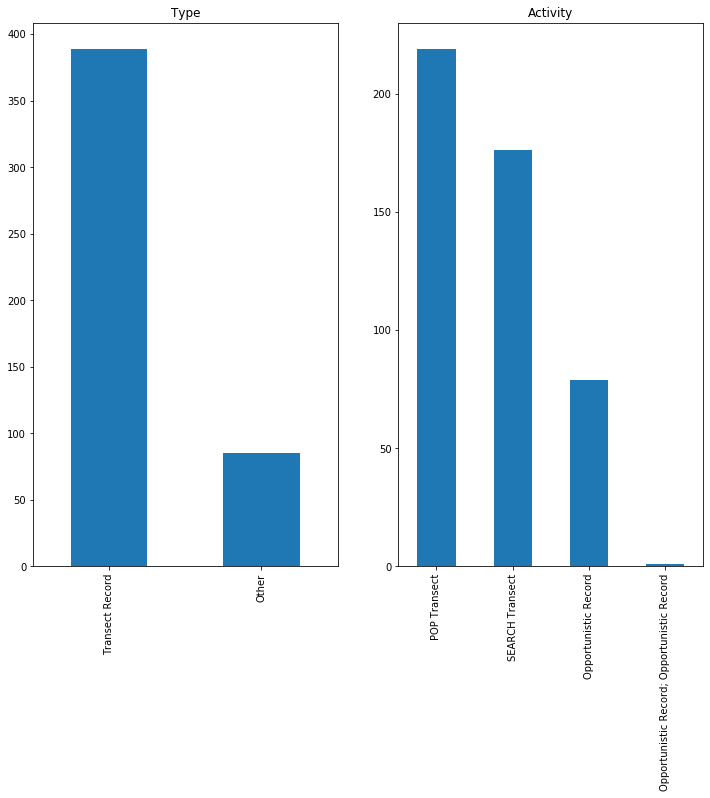

In [63]:
categorical_features = ["Type", "Activity"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(DF2[categorical_features]):
    DF3[categorical_feature].value_counts().plot(kind = "bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

C:\Users\Madhav Gulati\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  """


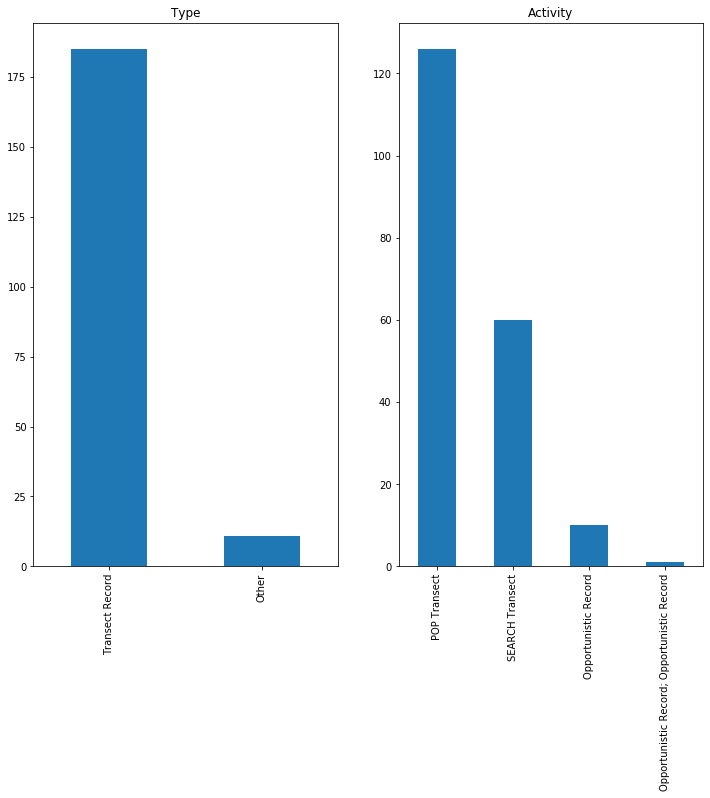

In [64]:
categorical_features = ["Type", "Activity"]
fig, ax = plt.subplots(1, len(categorical_features))
for i, categorical_feature in enumerate(DF2[categorical_features]):
    DFori[categorical_feature].value_counts().plot(kind ="bar", ax=ax[i]).set_title(categorical_feature)
fig.show()

In [65]:
DFori['Avg Distance'] = abs(DFori['Sin']*DFori['Range'])
DFori['Avg Distance'].head()

0    11.997062
1     7.951109
2     2.361374
3     7.303562
4     3.975555
Name: Avg Distance, dtype: float64

Text(0, 0.5, 'Probability')

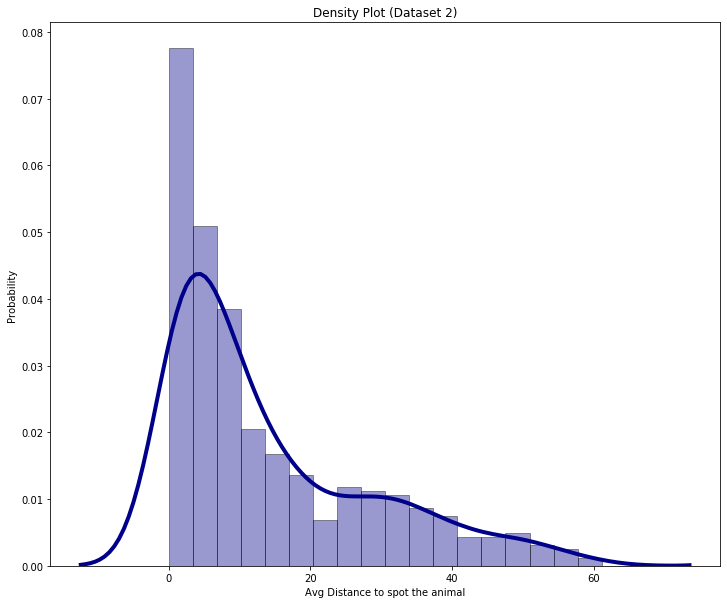

In [66]:
sns.distplot(DF3['Avg Distance'], hist=True, kde=True, 
             bins=int(180/10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Density Plot (Dataset 2)')
plt.xlabel('Avg Distance to spot the animal')
plt.ylabel('Probability')

Text(0, 0.5, 'Probability Density')

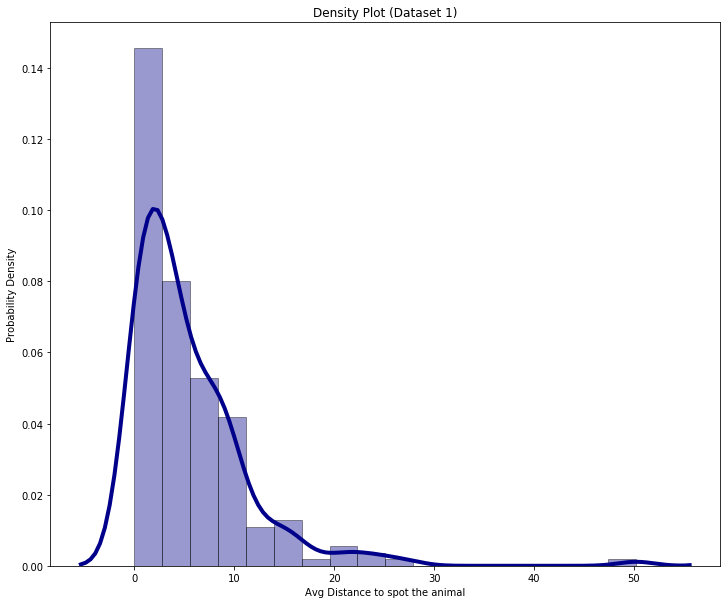

In [67]:
sns.distplot(DFori['Avg Distance'], hist=True, kde=True, 
             bins=int(180/10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Density Plot (Dataset 1)')
plt.xlabel('Avg Distance to spot the animal')
plt.ylabel('Probability Density')

In [68]:
Site = ['Purnamoota', 'Mutawintji NP']

Text(0, 0.5, 'Probabiblity Density')

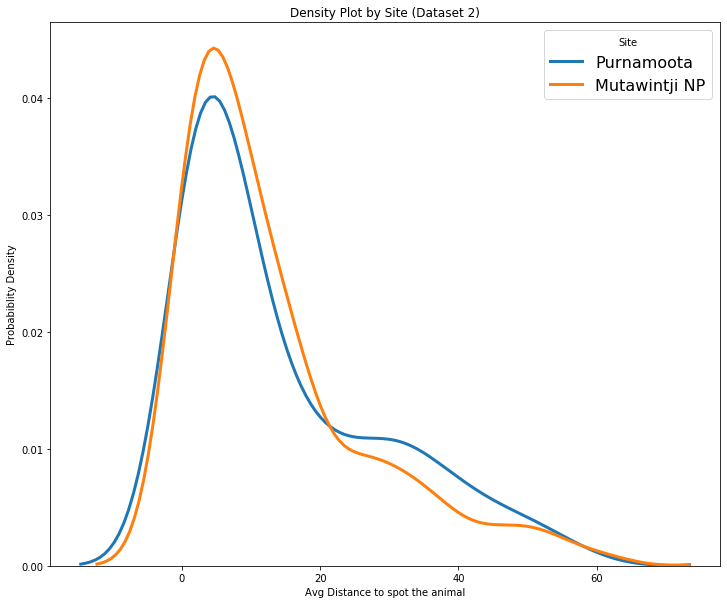

In [69]:
for distance in  Site:
    # Subset to the Site
    subset = DF3[DF3['Site'] == distance]
    
    # Draw the density plot
    sns.distplot(subset['Avg Distance'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = distance)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Site')
plt.title('Density Plot by Site (Dataset 2)')
plt.xlabel('Avg Distance to spot the animal')
plt.ylabel('Probabiblity Density')

Text(0, 0.5, 'Probability Density')

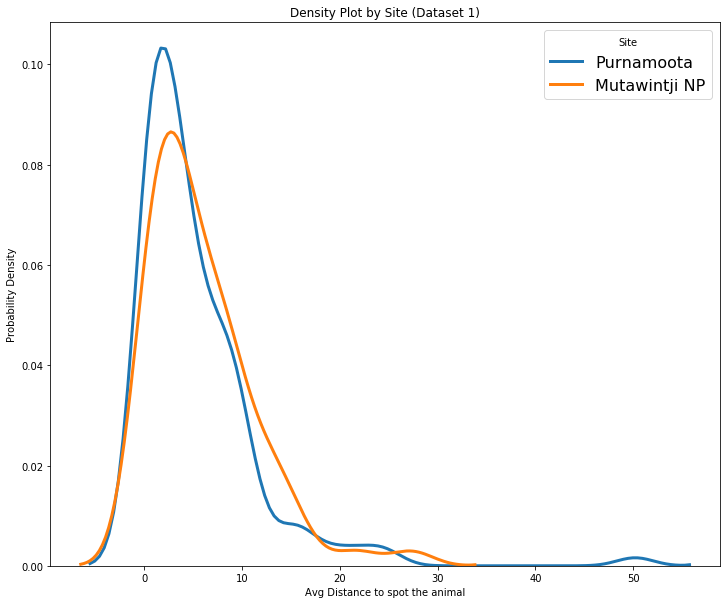

In [70]:
for distance in  Site:
    # Subset to the Site
    subset = DFori[DFori['Site'] == distance]
    
    # Draw the density plot
    sns.distplot(subset['Avg Distance'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = distance)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Site')
plt.title('Density Plot by Site (Dataset 1)')
plt.xlabel('Avg Distance to spot the animal')
plt.ylabel('Probability Density')

In [71]:
DFori['Range'].mean()

9.184771573604062

In [72]:
DF3['Range'].mean()

21.985473684210543

In [73]:
DF3['Avg Distance'].mean()

14.099344448493515

In [74]:
DFori['Avg Distance'].mean()

5.451593539918788

In [75]:
from scipy import stats
kde = stats.gaussian_kde(np.array(DF3['Avg Distance']))

In [76]:
print('Probability of spotting an animal within 5m of range of the Transect Line for (Dataset 2) is', kde.integrate_box_1d( 5, np.inf))

Probability of spotting an animal within 5m of range of the Transect Line for (Dataset 2) is 0.6733741158177885


In [77]:
kde1 = stats.gaussian_kde(np.array(DFori['Avg Distance']))

In [78]:
print('Probability of spotting an animal within 5m of range of the Transect Line for (Dataset 1) is ', kde1.integrate_box_1d( 5, np.inf))

Probability of spotting an animal within 5m of range of the Transect Line for (Dataset 1) is  0.4312840159806618


Text(0, 0.5, 'Probability Density')

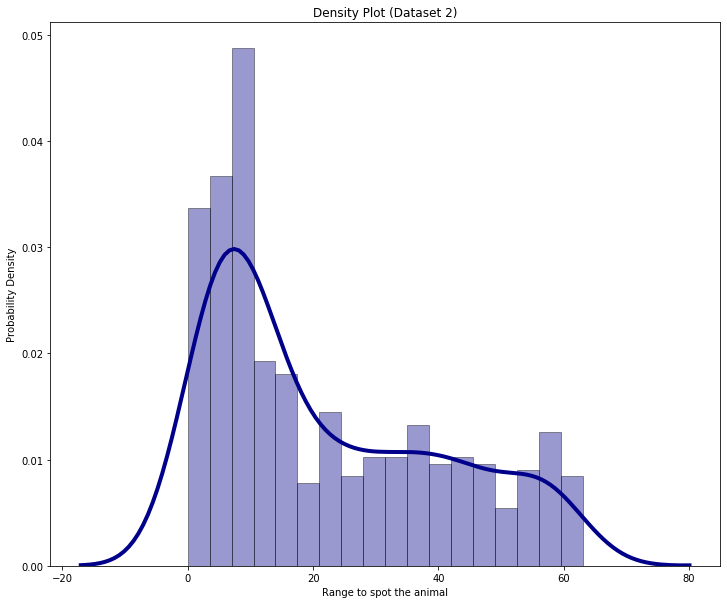

In [79]:
sns.distplot(DF3['Range'], hist=True, kde=True, 
             bins=int(180/10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Density Plot (Dataset 2)')
plt.xlabel('Range to spot the animal')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

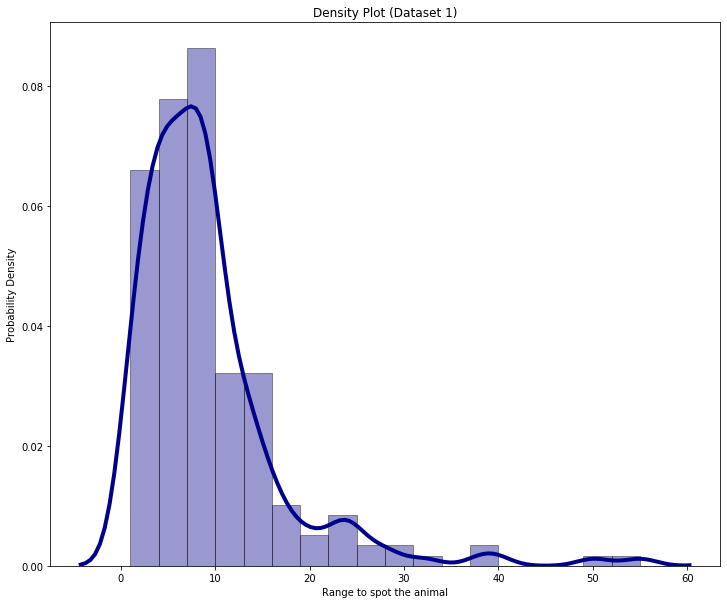

In [80]:
sns.distplot(DFori['Range'], hist=True, kde=True, 
             bins=int(180/10), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title('Density Plot (Dataset 1)')
plt.xlabel('Range to spot the animal')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

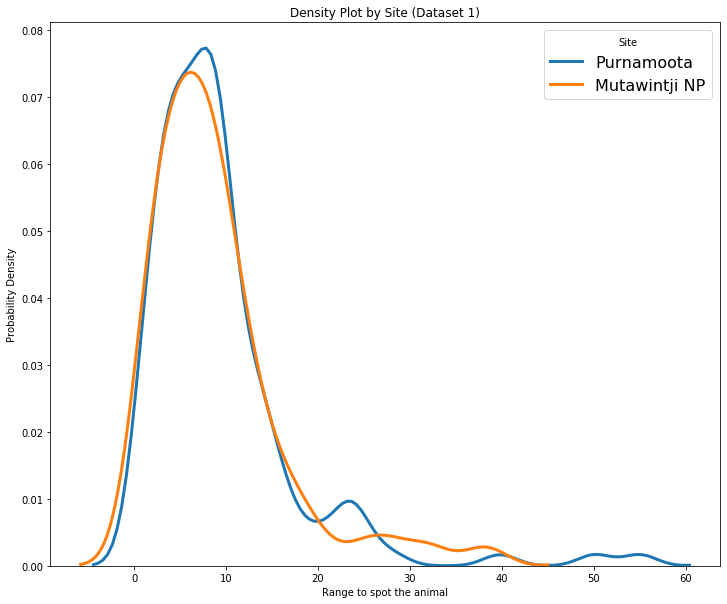

In [81]:
for distance in  Site:
    # Subset to the Site
    subset = DFori[DFori['Site'] == distance]
    
    # Draw the density plot
    sns.distplot(subset['Range'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = distance)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Site')
plt.title('Density Plot by Site (Dataset 1)')
plt.xlabel('Range to spot the animal')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

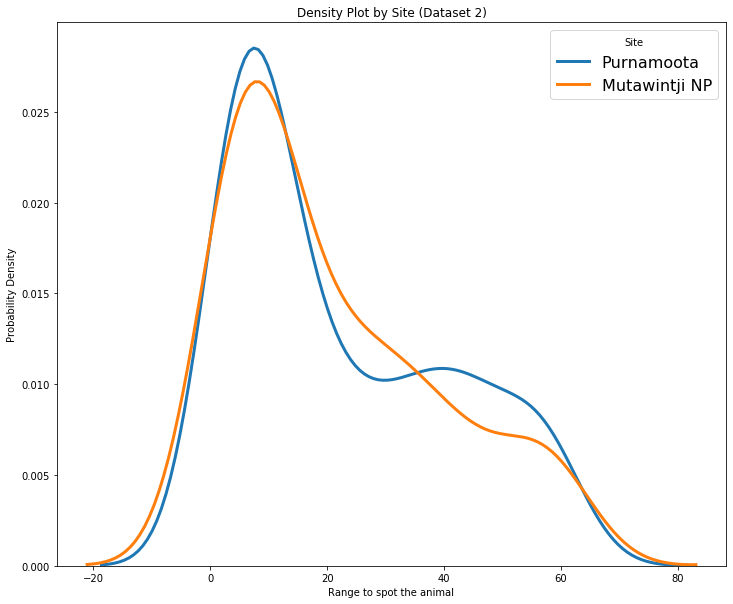

In [82]:
for distance in  Site:
    # Subset to the Site
    subset = DF3[DF3['Site'] == distance]
    
    # Draw the density plot
    sns.distplot(subset['Range'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = distance)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Site')
plt.title('Density Plot by Site (Dataset 2)')
plt.xlabel('Range to spot the animal')
plt.ylabel('Probability Density')

In [83]:
kde2 = stats.gaussian_kde(np.array(DFori['Range']))

In [84]:
kde3 = stats.gaussian_kde(np.array(DF3['Range']))

In [85]:
print('Probability of spotting an animal within 9m of range of the surveyor for (Dataset 1)', kde2.integrate_box_1d( 9, np.inf))

Probability of spotting an animal within 9m of range of the surveyor for (Dataset 1) 0.40754754497204626


In [86]:
print('Probability of spotting an animal within 9m of range of the Surveyor for (Dataset 2)', kde3.integrate_box_1d( 9, np.inf))

Probability of spotting an animal within 9m of range of the Surveyor for (Dataset 2) 0.6775409445468115


In [87]:
print('Probability of spotting an animal within 13.5m of range of the Surveyor for (Dataset 1)', kde2.integrate_box_1d( 13.5, np.inf))

Probability of spotting an animal within 13.5m of range of the Surveyor for (Dataset 1) 0.1901193611119748


In [88]:
print('Probability of spotting an animal within 13.5m of range of the Surveyor for (Dataset 2)', kde3.integrate_box_1d( 13.5, np.inf))

Probability of spotting an animal within 13.5m of range of the Surveyor for (Dataset 2) 0.555648125731275


In [89]:
print('Probability of spotting an animal within 22m of range of the Surveyor for (Dataset 1)', kde2.integrate_box_1d( 22, np.inf))

Probability of spotting an animal within 22m of range of the Surveyor for (Dataset 1) 0.06691318949946894


In [90]:
print('Probability of spotting an animal within 22m of range of the Surveyor for (Dataset 2)', kde3.integrate_box_1d( 22, np.inf))

Probability of spotting an animal within 22m of range of the Surveyor for (Dataset 2) 0.4114422766696968


In [91]:
print('Probability of spotting an animal within 8m of range of the Transect Line  for (Dataset 2) ', kde.integrate_box_1d( 8, np.inf))

Probability of spotting an animal within 8m of range of the Transect Line  for (Dataset 2)  0.5504167117786392


In [92]:
print('Probability of spotting an animal within 13.5m of range of the Transect Line  for (Dataset 2)', kde.integrate_box_1d( 13.5, np.inf))

Probability of spotting an animal within 13.5m of range of the Transect Line  for (Dataset 2) 0.38532762857206615


In [93]:
print('Probability of spotting an animal within 8m of range of the Transect Line for (Dataset 1) is ', kde1.integrate_box_1d( 8, np.inf))

Probability of spotting an animal within 8m of range of the Transect Line for (Dataset 1) is  0.2509164273491392


In [94]:
print('Probability of spotting an animal within 13.5m of range of the Transect Line for (Dataset 1)is ', kde1.integrate_box_1d( 13.5, np.inf))

Probability of spotting an animal within 13.5m of range of the Transect Line for (Dataset 1)is  0.08294490996520246


In [95]:
Type = ['Transect Record','Other' ]

Text(0, 0.5, 'Probability Density')

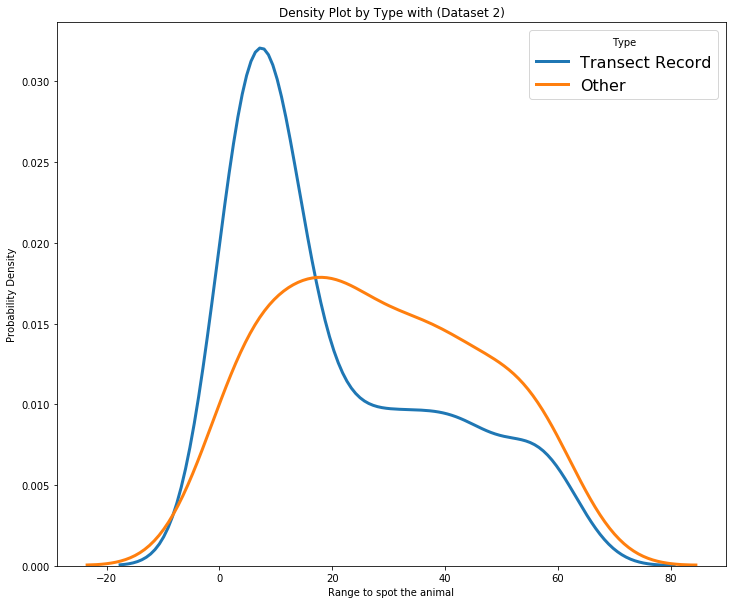

In [96]:
for distance in  Type:
    # Subset to the Site
    subset = DF3[DF3['Type'] == distance]
    
    # Draw the density plot
    sns.distplot(subset['Range'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = distance)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Type')
plt.title('Density Plot by Type with (Dataset 2)')
plt.xlabel('Range to spot the animal')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

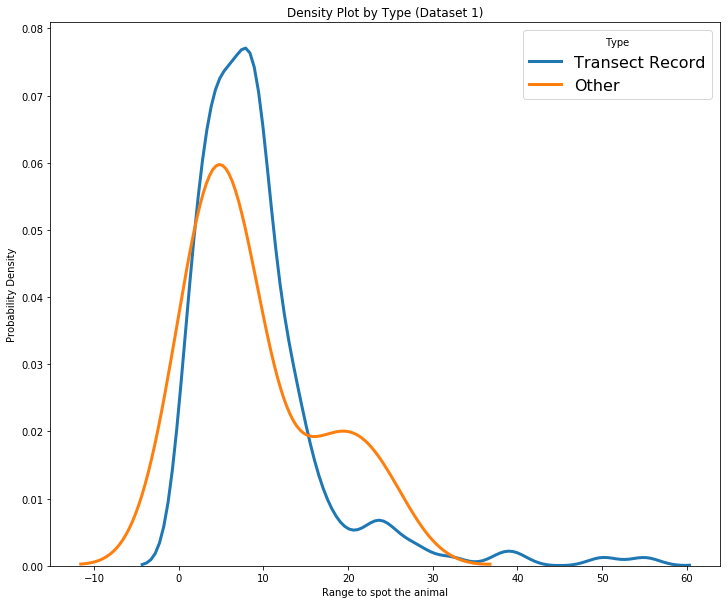

In [97]:
for distance in  Type:
    # Subset to the Site
    subset = DFori[DFori['Type'] == distance]
    
    # Draw the density plot
    sns.distplot(subset['Range'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = distance)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Type')
plt.title('Density Plot by Type (Dataset 1)')
plt.xlabel('Range to spot the animal')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

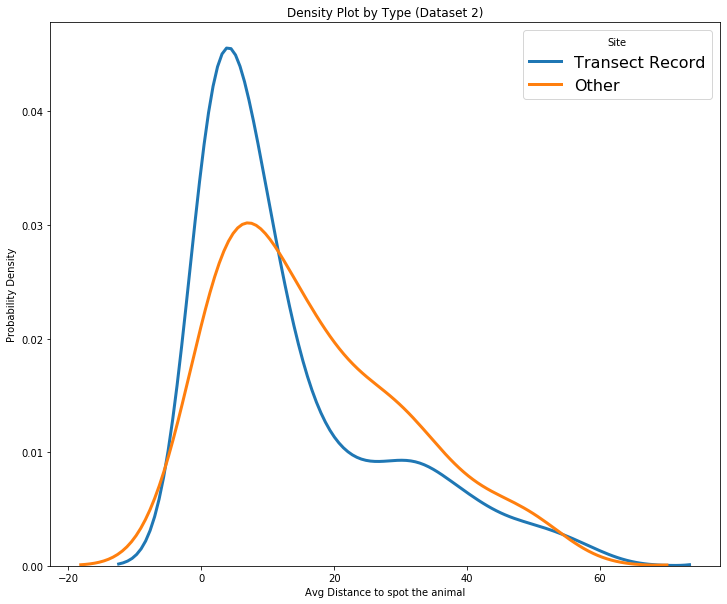

In [98]:
for distance in  Type:
    # Subset to the Site
    subset = DF3[DF3['Type'] == distance]
    
    # Draw the density plot
    sns.distplot(subset['Avg Distance'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = distance)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Site')
plt.title('Density Plot by Type (Dataset 2)')
plt.xlabel('Avg Distance to spot the animal')
plt.ylabel('Probability Density')

Text(0, 0.5, 'Probability Density')

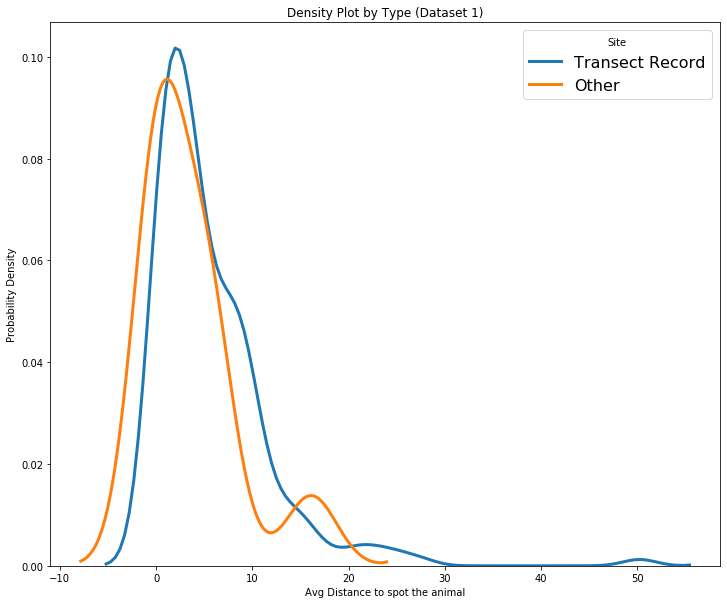

In [99]:
for distance in  Type:
    # Subset to the Site
    subset = DFori[DFori['Type'] == distance]
    
    # Draw the density plot
    sns.distplot(subset['Avg Distance'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = distance)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Site')
plt.title('Density Plot by Type (Dataset 1)')
plt.xlabel('Avg Distance to spot the animal')
plt.ylabel('Probability Density')

In [100]:
Activity = ['POP Transect', 'SEARCH Transect', 'Opportunistic Record', 'Opportunistic Record, Opportunistic Record']

C:\Users\Madhav Gulati\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Madhav Gulati\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Probability Density')

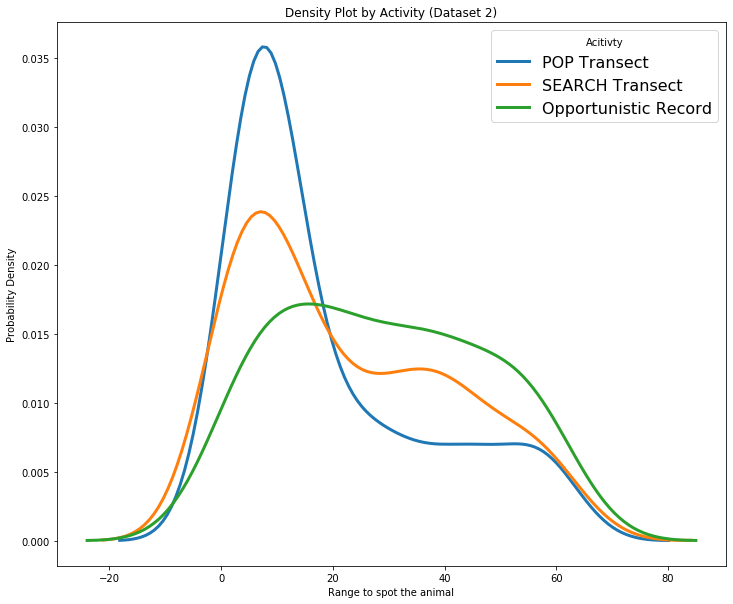

In [101]:
for distance in  Activity:
    # Subset to the Site
    subset = DF3[DF3['Activity'] == distance]
    
    # Draw the density plot
    sns.distplot(subset['Range'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = distance)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Acitivty')
plt.title('Density Plot by Activity (Dataset 2)')
plt.xlabel('Range to spot the animal')
plt.ylabel('Probability Density')

C:\Users\Madhav Gulati\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Madhav Gulati\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Probability Density')

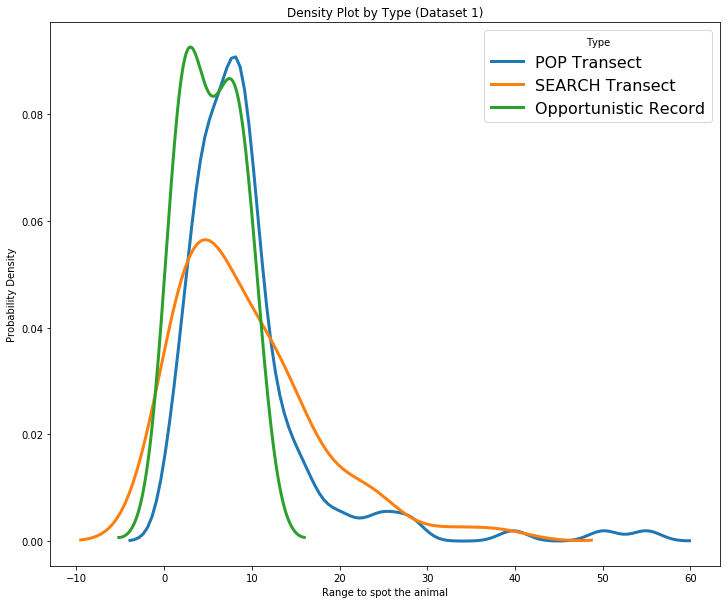

In [102]:
for distance in  Activity:
    # Subset to the Site
    subset = DFori[DFori['Activity'] == distance]
    
    # Draw the density plot
    sns.distplot(subset['Range'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = distance)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Type')
plt.title('Density Plot by Type (Dataset 1)')
plt.xlabel('Range to spot the animal')
plt.ylabel('Probability Density')

C:\Users\Madhav Gulati\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Madhav Gulati\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Probability Density')

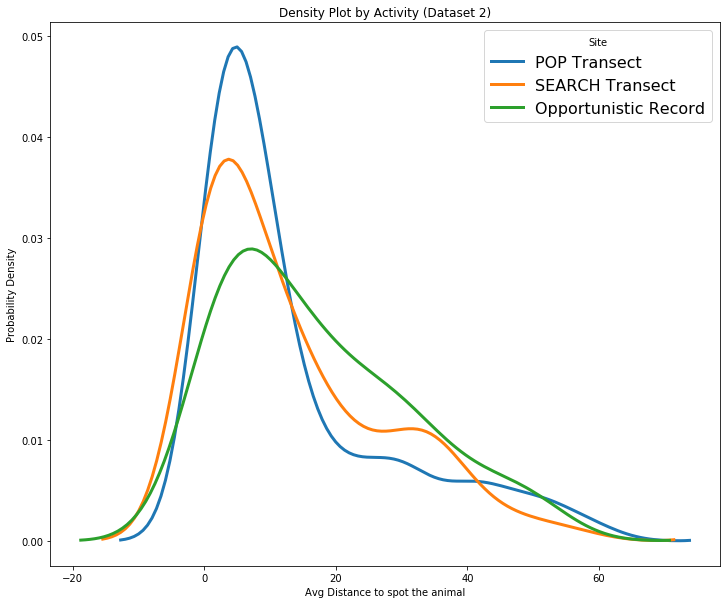

In [103]:
for distance in  Activity:
    # Subset to the Site
    subset = DF3[DF3['Activity'] == distance]
    
    # Draw the density plot
    sns.distplot(subset['Avg Distance'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = distance)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Site')
plt.title('Density Plot by Activity (Dataset 2)')
plt.xlabel('Avg Distance to spot the animal')
plt.ylabel('Probability Density')

C:\Users\Madhav Gulati\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Madhav Gulati\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Text(0, 0.5, 'Probability Density')

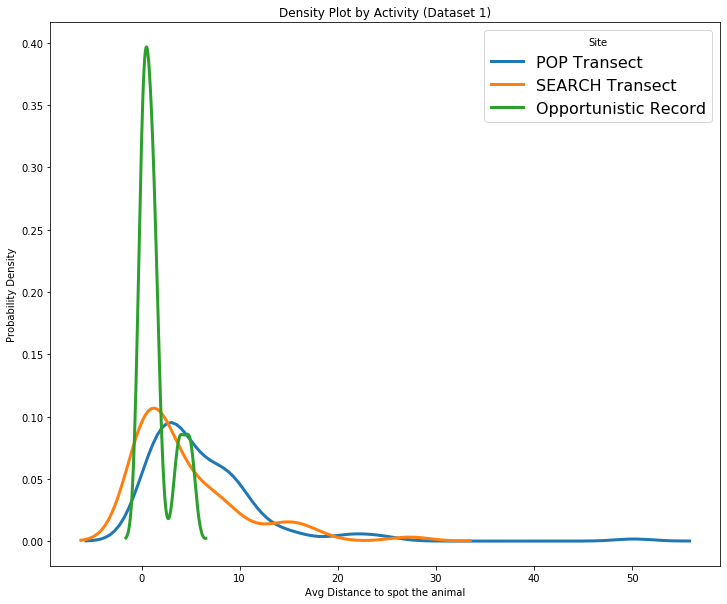

In [104]:
for distance in  Activity:
    # Subset to the Site
    subset = DFori[DFori['Activity'] == distance]
    
    # Draw the density plot
    sns.distplot(subset['Avg Distance'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = distance)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Site')
plt.title('Density Plot by Activity (Dataset 1)')
plt.xlabel('Avg Distance to spot the animal')
plt.ylabel('Probability Density')

In [105]:
#DF3.to_excel(r'C:\Users\Madhav Gulati\OneDrive\BRD Project Area\BRD Analysis Random.xlsx', sheet_name='BRD', index = True)

In [106]:
#DFori.to_excel(r'C:\Users\Madhav Gulati\OneDrive\BRD Project Area\BRD Analysis.xlsx', sheet_name='BRD', index = True)